In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from imblearn.over_sampling  import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn import linear_model
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv("Downloads\credict card fraud detection.csv")

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# DEFAULT - Default payment next month (Yes=1, No=0)
LIMIT_BAL - Amount of the given credit (INR)
SEX - Gender (1 = male; 2 = female)
EDUCATION - Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
MARRIAGE - (1 = married; 2 = single; 3 = others)
AGE - (year)

PAST_PAY - History of repayment status
- PAST_PAY1 = the repayment status in September 2005
- PAST_PAY2 = the repayment status in August 2005
- PAST_PAY6 = the repayment status in April 2005

- The measurement scale for the repayment status is


 i.  -1 = pay duly <br>
ii.  1 = payment delay for one month<br>
iii. 2 = payment delay for two months <br>
iv.  8 = payment delay for eight months<br>
v.   9 = payment delay for nine months and above <br>

BILL_AMT- Amount of bill statement (INR)
- BILL_AMT1 = amount of bill statement in September 2005
- BILL_AMT2 = amount of bill statement in August 2005
- BILL_AMT6 = amount of bill statement in April 2005

PAY_AMT - Amount of previous payment (INR)
- PAY_AMT1 = amount paid in September 2005
- PAY_AMT2 = amount paid in August 2005
- PAY_AMT6 = amount paid in April 2005

In [4]:
df.shape

(30000, 25)

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [7]:

print("There are {} missing records in the dataset.".format(df.isnull().sum().sum()))

There are 0 missing records in the dataset.


In [8]:
df.rename({'default.payment.next.month':'default'},axis=1,inplace=True)

In [9]:
df.shape

(30000, 25)

# checking for unique values in the columns

    

In [10]:
for col in df.columns:
    print(col,":",df[col].unique())

ID : [    1     2     3 ... 29998 29999 30000]
LIMIT_BAL : [  20000.  120000.   90000.   50000.  500000.  100000.  140000.  200000.
  260000.  630000.   70000.  250000.  320000.  360000.  180000.  130000.
  450000.   60000.  230000.  160000.  280000.   10000.   40000.  210000.
  150000.  380000.  310000.  400000.   80000.  290000.  340000.  300000.
   30000.  240000.  470000.  480000.  350000.  330000.  110000.  420000.
  170000.  370000.  270000.  220000.  190000.  510000.  460000.  440000.
  410000.  490000.  390000.  580000.  600000.  620000.  610000.  700000.
  670000.  680000.  430000.  550000.  540000. 1000000.  530000.  710000.
  560000.  520000.  750000.  640000.   16000.  570000.  590000.  660000.
  720000.  327680.  740000.  800000.  760000.  690000.  650000.  780000.
  730000.]
SEX : [2 1]
EDUCATION : [2 1 3 5 4 6 0]
MARRIAGE : [1 2 3 0]
AGE : [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21

In [11]:
len(df[df['MARRIAGE']==0])

54

# 54 null columns in the MARRIAGE COLUMN

In [12]:
len(df[df['EDUCATION']==5])


280

In [13]:
len(df[df['EDUCATION']==6])

51

In [14]:
df.dtypes

ID             int64
LIMIT_BAL    float64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_0          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
default        int64
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_0      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


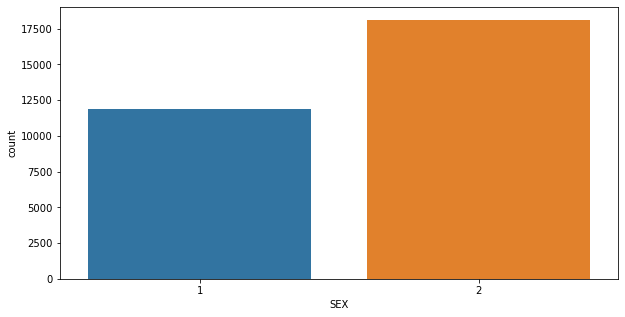

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


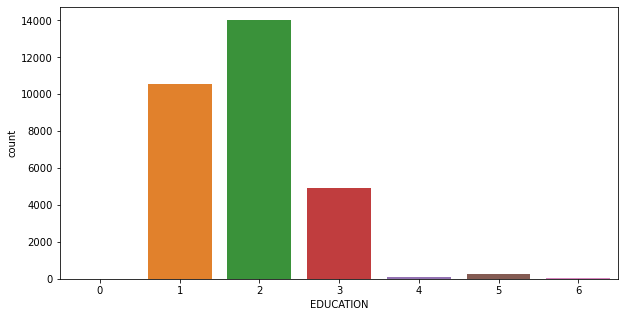

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


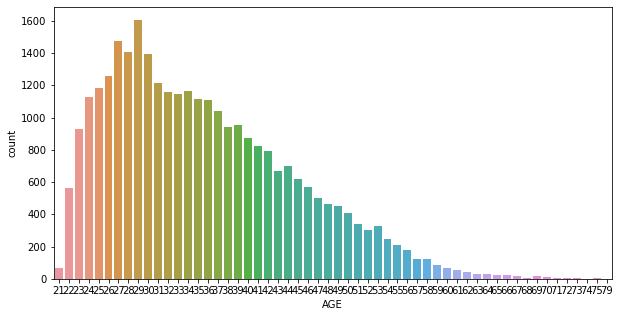

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


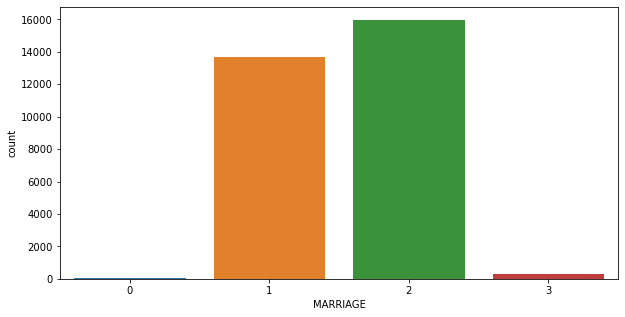

In [16]:
#Exploratory data analysis

for x in ['SEX','EDUCATION','AGE','MARRIAGE']:
    plt.figure(figsize=(10,5))
    sns.countplot(df[x])
    plt.show()

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


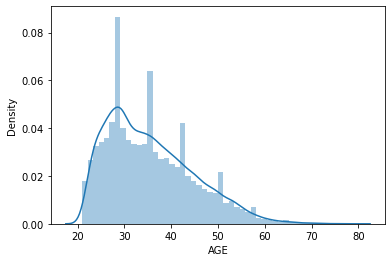

In [17]:
sns.distplot(df.AGE)
plt.show()

In [18]:
df.AGE.mean()

35.4855

In [19]:
df.AGE.std()

9.217904068090183

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


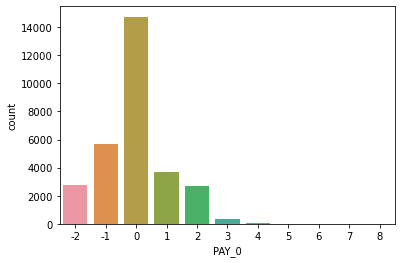

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


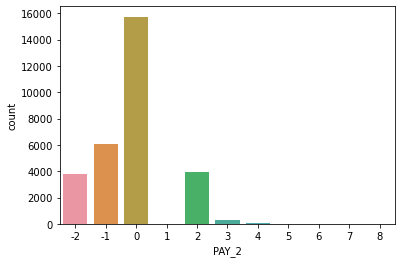

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


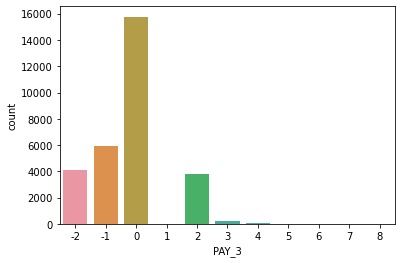

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


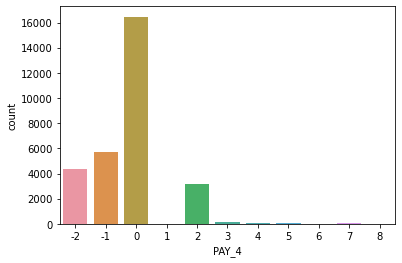

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


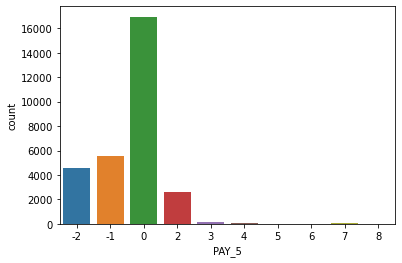

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


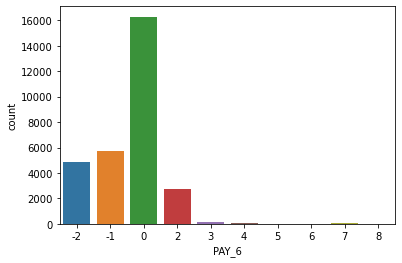

In [20]:
for x in df.iloc[:,6:12]:
    sns.countplot(df[x])
    plt.show()

In [21]:
# box plot for limit balance  and bill amount

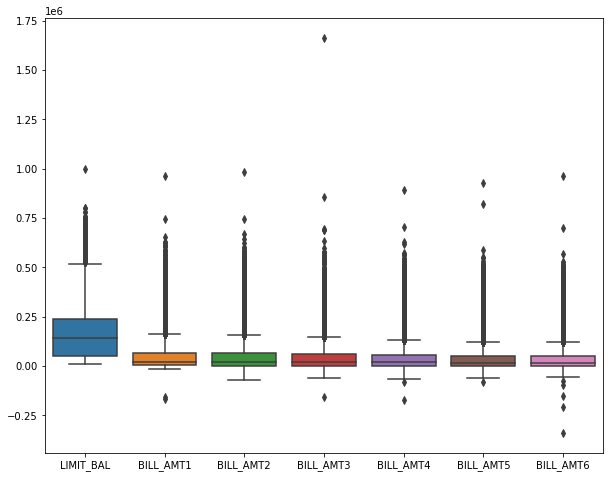

In [22]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df[['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']])
plt.show()



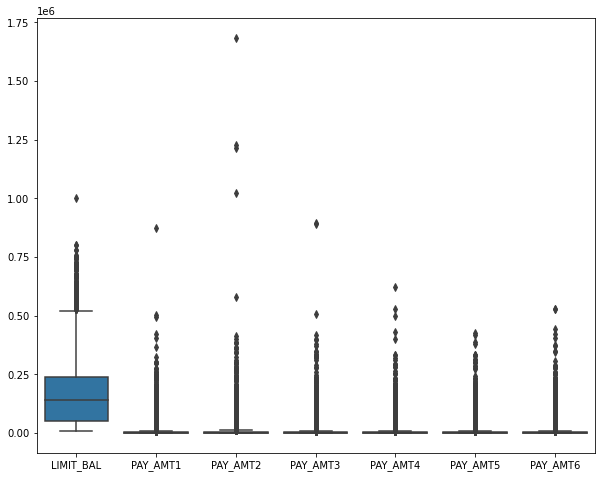

In [23]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df[['LIMIT_BAL','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']])
plt.show()


In [24]:
#outliers
outliers=df.select_dtypes(exclude='object')
for i in outliers:
    
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    
    iqr=q3-q1
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    
    print('iqr of',i,'=`',iqr)
    print('ub of',i,'=',ub)
    print('lb of',i,'=',lb)
    print('number of outliers in',i,'=',(df.shape[0]-df[(df[i]<ub)& (df[i]>lb)].shape[0]))

iqr of ID =` 14999.5
ub of ID = 44999.5
lb of ID = -14998.5
number of outliers in ID = 0
iqr of LIMIT_BAL =` 190000.0
ub of LIMIT_BAL = 525000.0
lb of LIMIT_BAL = -235000.0
number of outliers in LIMIT_BAL = 167
iqr of SEX =` 1.0
ub of SEX = 3.5
lb of SEX = -0.5
number of outliers in SEX = 0
iqr of EDUCATION =` 1.0
ub of EDUCATION = 3.5
lb of EDUCATION = -0.5
number of outliers in EDUCATION = 454
iqr of MARRIAGE =` 1.0
ub of MARRIAGE = 3.5
lb of MARRIAGE = -0.5
number of outliers in MARRIAGE = 0
iqr of AGE =` 13.0
ub of AGE = 60.5
lb of AGE = 8.5
number of outliers in AGE = 272
iqr of PAY_0 =` 1.0
ub of PAY_0 = 1.5
lb of PAY_0 = -2.5
number of outliers in PAY_0 = 3130
iqr of PAY_2 =` 1.0
ub of PAY_2 = 1.5
lb of PAY_2 = -2.5
number of outliers in PAY_2 = 4410
iqr of PAY_3 =` 1.0
ub of PAY_3 = 1.5
lb of PAY_3 = -2.5
number of outliers in PAY_3 = 4209
iqr of PAY_4 =` 1.0
ub of PAY_4 = 1.5
lb of PAY_4 = -2.5
number of outliers in PAY_4 = 3508
iqr of PAY_5 =` 1.0
ub of PAY_5 = 1.5
lb of PAY_

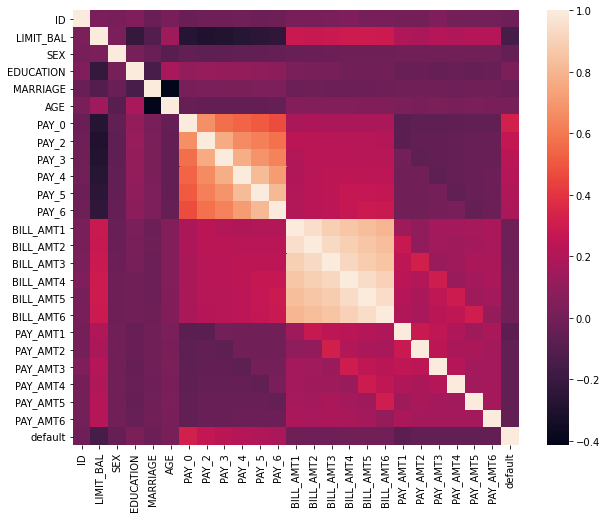

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())
plt.show()

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE', ylabel='Density'>

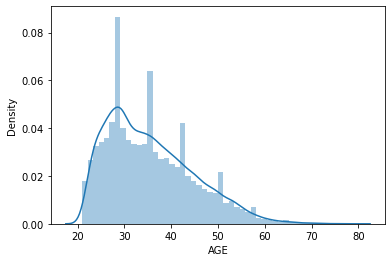

In [26]:
sns.distplot(df.AGE)

<AxesSubplot:ylabel='AGE'>

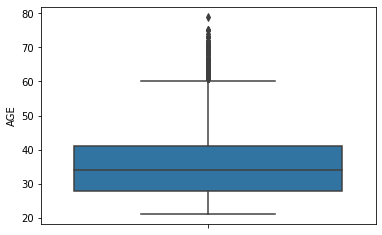

In [27]:
sns.boxplot(y=df.AGE)

In [28]:
# binning the pay column
def pay (x):
    if x==0:
        return 'paid duly'
    if x==-1:
        return 'paid duly'
    if x==-2:
        return 'paid duly'
    
    if x in range (1,4):
        return '1 to 3'
    if x in range (4,7):
        return '4 to 6'
    if x in range (7,9):
        return '7 to 9'

for x in df.iloc[:,6:12]:
    df[x]=df[x].apply(pay)
    
        
    

In [29]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,1 to 3,1 to 3,paid duly,paid duly,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,paid duly,1 to 3,paid duly,paid duly,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,paid duly,paid duly,paid duly,paid duly,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,paid duly,paid duly,paid duly,paid duly,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,paid duly,paid duly,paid duly,paid duly,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [30]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [31]:
def education(x):
    if x in [0,4,5,6]:
        return 4
    else:
        return x
    
df['EDUCATION']=df['EDUCATION'].apply(education)

In [32]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,1 to 3,1 to 3,paid duly,paid duly,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,paid duly,1 to 3,paid duly,paid duly,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,paid duly,paid duly,paid duly,paid duly,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,paid duly,paid duly,paid duly,paid duly,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,paid duly,paid duly,paid duly,paid duly,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# label encoding

In [33]:
encoder=LabelEncoder()

In [34]:
for col in df.select_dtypes(include=object).columns:
    df[col]=encoder.fit_transform(df[col])

In [35]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,0,0,3,3,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,3,0,3,3,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,3,3,3,3,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,3,3,3,3,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,3,3,3,3,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [36]:
for col in df.columns:
    print(col,":",df[col].unique())

ID : [    1     2     3 ... 29998 29999 30000]
LIMIT_BAL : [  20000.  120000.   90000.   50000.  500000.  100000.  140000.  200000.
  260000.  630000.   70000.  250000.  320000.  360000.  180000.  130000.
  450000.   60000.  230000.  160000.  280000.   10000.   40000.  210000.
  150000.  380000.  310000.  400000.   80000.  290000.  340000.  300000.
   30000.  240000.  470000.  480000.  350000.  330000.  110000.  420000.
  170000.  370000.  270000.  220000.  190000.  510000.  460000.  440000.
  410000.  490000.  390000.  580000.  600000.  620000.  610000.  700000.
  670000.  680000.  430000.  550000.  540000. 1000000.  530000.  710000.
  560000.  520000.  750000.  640000.   16000.  570000.  590000.  660000.
  720000.  327680.  740000.  800000.  760000.  690000.  650000.  780000.
  730000.]
SEX : [2 1]
EDUCATION : [2 1 3 4]
MARRIAGE : [1 2 3 0]
AGE : [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66

In [37]:
df.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

# Droping the unnecessary columns for the model

In [38]:
df.drop(['ID'],axis=1,inplace=True)

In [39]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,0,0,3,3,3,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,3,0,3,3,3,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,3,3,3,3,3,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,3,3,3,3,3,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,3,3,3,3,3,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# splitting data set into x,y variables

In [40]:
x=df.drop('default',axis=1)
y=df['default']

In [41]:
#train and test split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [43]:
x_train.shape


(21000, 23)

In [44]:
y_train.shape

(21000,)

In [45]:
df.default.value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [46]:
df.shape

(30000, 24)

In [47]:
#under sampling the data 

nm=NearMiss()
x_train_nm,y_train_nm=nm.fit_resample(x_train,y_train)

In [48]:
x_train_nm.shape

(9392, 23)

In [49]:
y_train_nm.shape

(9392,)

In [50]:
#over sampling
smote=SMOTE(sampling_strategy='minority')
x_train_s,y_train_s=smote.fit_resample(x_train,y_train)

In [51]:
x_train_s.shape

(32608, 23)

In [52]:
y_train_s.shape

(32608,)

In [53]:
log=linear_model.LogisticRegression(solver='liblinear', fit_intercept=True)


In [54]:
log.fit(x_train_s,y_train_s)

LogisticRegression(solver='liblinear')

In [55]:
log.score(x_test,y_test)

0.7333333333333333

In [56]:
log.score(x_train_s,y_train_s)

0.6979268891069677

In [58]:
y_hat=log.predict(x_train_s)

In [76]:
y_test_p=log.predict(x_test)

In [73]:
print('training data set report:','\n',metrics.classification_report(y_train_s,y_hat))

training data set report: 
               precision    recall  f1-score   support

           0       0.67      0.79      0.72     16304
           1       0.74      0.61      0.67     16304

    accuracy                           0.70     32608
   macro avg       0.70      0.70      0.70     32608
weighted avg       0.70      0.70      0.70     32608



In [77]:
print('test data report:','\n',metrics.classification_report(y_test,y_test_p))

test data report: 
               precision    recall  f1-score   support

           0       0.86      0.78      0.82      7060
           1       0.41      0.55      0.47      1940

    accuracy                           0.73      9000
   macro avg       0.64      0.67      0.65      9000
weighted avg       0.77      0.73      0.75      9000



In [90]:
decision_tree=DecisionTreeClassifier(max_depth=3,random_state=3)
decision_tree.fit(x_train_s,y_train_s)

DecisionTreeClassifier(max_depth=3, random_state=3)

In [91]:
decision_tree.score(x_test,y_test)

0.811

In [92]:
decision_tree.score(x_train_s,y_train_s)

0.7741658488714426

In [93]:
y_pred1=decision_tree.predict(x_train_s)

In [94]:
y_test_pred1=decision_tree.predict(x_test)

In [98]:
print('classification report test:','\n',metrics.classification_report(y_test,y_test_pred1))

classification report test: 
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      7060
           1       0.58      0.44      0.50      1940

    accuracy                           0.81      9000
   macro avg       0.72      0.68      0.69      9000
weighted avg       0.80      0.81      0.80      9000

